# Embedding 可视化

用 t-SNE 和 PCA 对 embedding 降维，做 2D & 3D 可视化

In [1]:
# !pip install pypinyin

In [2]:
from transformers import BertModel, BertTokenizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pypinyin
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import torch

In [3]:
CN_BERT_PATH = './data/bert-base-chinese'
EN_BERT_PATH = './data/bert-base-uncased'

## 1. 红楼梦中的人物关系

In [4]:
# 加载模型
tokenizer = BertTokenizer.from_pretrained(CN_BERT_PATH)
model = BertModel.from_pretrained(CN_BERT_PATH)

Some weights of the model checkpoint at ./data/bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
# 批量计算 embeddings
def get_embeddings(corpus):
    encoded_inputs = tokenizer(corpus,
                               padding='max_length',
                               truncation=True,
                               return_tensors='pt')

    with torch.no_grad():
        outputs = model(**encoded_inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1)

    return embeddings

In [6]:
corpus = ['贾宝玉',
          '林黛玉',
          '薛宝钗',
          '曹雪芹',
          '王熙凤',
          '贾母',
          '贾政',
          '贾元春',
          '王夫人',
          '妙玉',
          '史湘云',
          '秦可卿',
          '刘姥姥',
          '平儿',
          '贾琏',
          '晴雯',
          '袭人']

embeddings = get_embeddings(corpus)
embeddings.shape

torch.Size([17, 768])

In [7]:
embeddings

tensor([[-0.4398,  0.1033, -0.6718,  ...,  0.3174, -0.5352, -0.2859],
        [-0.4141, -0.1783, -0.5273,  ...,  0.1371, -0.3969, -0.1629],
        [-0.3871,  0.0049, -0.3214,  ...,  0.4102, -0.1385, -0.2349],
        ...,
        [-0.5592,  0.0489, -0.5018,  ...,  0.2856, -0.3641, -0.1688],
        [-0.3730,  0.0323, -0.4722,  ...,  0.3617, -0.0808,  0.1712],
        [-0.8639,  0.1731, -0.4939,  ...,  0.4009,  0.0090, -0.0144]])

In [8]:
tsne = TSNE(n_components=2,
            perplexity=10,
            random_state=42,
            init='pca',
            learning_rate=100)
vis_dims = tsne.fit_transform(embeddings)
vis_dims.shape

(17, 2)

In [9]:
# 用 pypinyin 将人名转成拼音
name = '名字'
pypinyin.pinyin(name, style=pypinyin.Style.NORMAL)

[['ming'], ['zi']]

In [10]:
def get_pinyin(name):
    return ''.join(
        [e[0][0].upper()+e[0][1:]
         for e in pypinyin.pinyin(name, style=pypinyin.Style.NORMAL)
         if len(e) > 0]
    )

labels = [get_pinyin(n) for n in corpus]
# labels

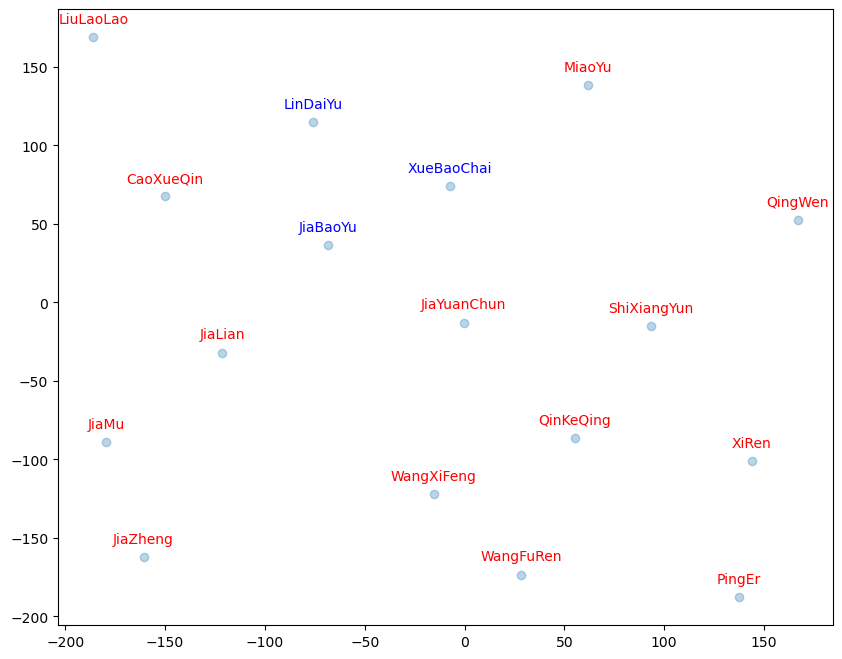

In [11]:
x = vis_dims[:,0]
y = vis_dims[:,1]

plt.figure(figsize=(10, 8))

plt.scatter(x, y, alpha=0.3)
for i, label in enumerate(labels):
    color = 'blue' if label in labels[:3] else 'red'
    plt.annotate(label, (x[i], y[i]),
                 textcoords="offset points",
                 xytext=(0, 10), 
                 ha='center',
                 color=color)

plt.show()

## 2. 中英美城市群

In [12]:
# 加载模型
tokenizer = BertTokenizer.from_pretrained(EN_BERT_PATH)
model = BertModel.from_pretrained(EN_BERT_PATH)

Some weights of the model checkpoint at ./data/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [13]:
cn_citys = [
    'Beijing',
    'Shanghai',
    'Guangzhou',
    'Shenzhen',
    'Chengdu',
    'Hangzhou',
    'Wuhan',
    'Chongqing',
    'Nanjing',
    'Xiamen',
]
uk_citys = [
    'London',
    'Birmingham',
    'Manchester',
    'Liverpool',
    'Edinburgh',
    'Glasgow',
    'Bristol',
    'Sheffield',
    'Leeds',
    'Coventry',
]
usa_citys = [
    'Chicago',
    'Houston',
    'Phoenix',
    'Philadelphia',
]

citys = cn_citys + uk_citys + usa_citys
len(citys)

24

In [14]:
city_embeddings = get_embeddings(citys)
city_embeddings.shape

torch.Size([24, 768])

### 2.1 t-SNE

In [15]:
tsne = TSNE(n_components=2,
            perplexity=15,
            init='random',
            learning_rate=100)
vis_dims = tsne.fit_transform(city_embeddings)
vis_dims.shape

(24, 2)

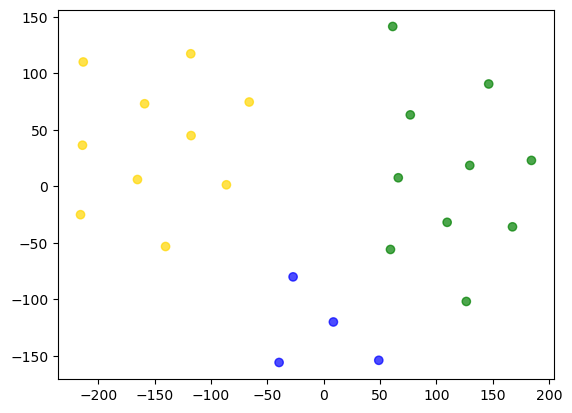

In [16]:
colors = ['gold', 'green', 'blue']
color_indices = ([0 for _ in cn_citys]
                +[1 for _ in uk_citys]
                +[2 for _ in usa_citys])

x = vis_dims[:,0]
y = vis_dims[:,1]

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y,
            c=color_indices,
            cmap=colormap,
            alpha=0.7)

plt.show()

### 2.2 PCA

In [17]:
pca = PCA(n_components=3)
vis_dims = pca.fit_transform(city_embeddings)
vis_dims.shape

(24, 3)

In [18]:
labels = (['cn' for _ in cn_citys]
         +['uk' for _ in uk_citys]
         +['usa' for _ in usa_citys])

samples = pd.DataFrame()
samples["category"] = labels
samples["embed_vis"] = vis_dims.tolist()
# samples

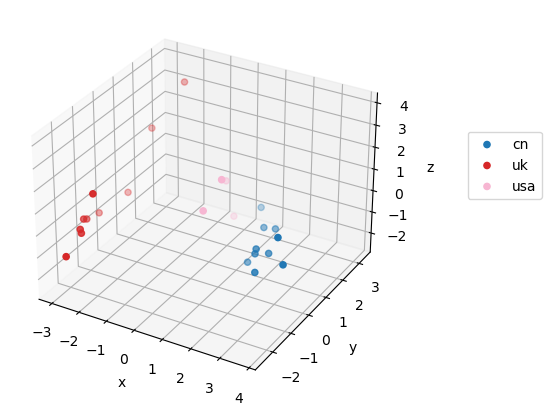

In [19]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')
cmap = plt.get_cmap("tab20")

categories = ['cn', 'uk', 'usa']
for i, cat in enumerate(categories):
    sub_matrix = np.array(samples[samples['category'] == cat]["embed_vis"].to_list())
    x=sub_matrix[:, 0]
    y=sub_matrix[:, 1]
    z=sub_matrix[:, 2]
    colors = [cmap(i/len(categories))] * len(sub_matrix)
    ax.scatter(x, y, zs=z, zdir='z', c=colors, label=cat)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(bbox_to_anchor=(1.4, 0.7))

参考：

- https://github.com/openai/openai-cookbook/blob/main/examples/Visualizing_embeddings_in_2D.ipynb
- https://github.com/openai/openai-cookbook/blob/main/examples/Visualizing_embeddings_in_3D.ipynb